In [2]:
#   Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Summary
This analysis focuses on Argentina's macroeconomic data

## Prep

### Inflation data

In [122]:
#   read in inflation data
arg_i = pd.read_csv('./../data/argentina-inflation-raw.csv')

#   preview
display(arg_i)

,Date,Rate
0,01/31/1970,6.5
1,02/28/1970,9.5
2,03/31/1970,9.6
3,04/30/1970,10.4
4,05/31/1970,12.7
...,...,...
637,02/28/2023,102.5
638,03/31/2023,104.3
639,04/30/2023,108.8
640,05/31/2023,114.2


In [123]:
# Review data types
arg_i.dtypes

Date    object
Rate    object
dtype: object

In [124]:
#   Annualize inflation data through arithmetic average

# Parse year
arg_i["year"] = pd.to_datetime(arg_i["Date"], format = '%m/%d/%Y').dt.year

# # group by year with mean aggregation
# arg_inflation = arg_i.groupby(by = "year").mean()

# arg_inflation

An error occurs and may be due to the `Rate` column being considered an 'object'; review why it cannot easily be turned to a float

In [125]:
## review observations
# for rate in arg_i.Rate:
#     print(rate)

arg_i["Rate"][184]

'1.010.0'

Above is a sample of the issue: multiple decimal points... 

Remove with regex

In [126]:
#   replace secondary decimal point
arg_i2 = arg_i.copy()
arg_i2["Rate"] = arg_i2["Rate"].str.replace(r'(\d+\.)(\d+)\.(\d+)', r'\1\2\3')

# # Review
# for index, row in arg_i2["Rate"].items():
#     # print(f"{index}: {row}")

#     print(f"{index}: | Old: {arg_i['Rate'][index]} | New: {row}")

Note: this was a misinterpretation of what the issue of the format was. The actual issue was that the first decimal point served as a comma.

* e.g. 1.200.5 = 1,200.5 = 1200.5

Adjustment made below

In [127]:
#   Replace initial decimal point with comma where there is two points
arg_i2 = arg_i.copy()
arg_i2["Rate"] = arg_i2["Rate"].str.replace(r'(\d+)\.(\d+\.)(\d+)', r'\1\2\3')

# Review
for index, row in arg_i2["Rate"].items():
    # print(f"{index}: {row}")

    print(f"{index}: | Old: {arg_i['Rate'][index]} | New: {row}")

0: | Old: 6.5 | New: 6.5
1: | Old: 9.5 | New: 9.5
2: | Old: 9.6 | New: 9.6
3: | Old: 10.4 | New: 10.4
4: | Old: 12.7 | New: 12.7
5: | Old: 12.5 | New: 12.5
6: | Old: 12.3 | New: 12.3
7: | Old: 14.5 | New: 14.5
8: | Old: 14.7 | New: 14.7
9: | Old: 17.4 | New: 17.4
10: | Old: 19.6 | New: 19.6
11: | Old: 21.7 | New: 21.7
12: | Old: 27.4 | New: 27.4
13: | Old: 29.9 | New: 29.9
14: | Old: 29.6 | New: 29.6
15: | Old: 29.8 | New: 29.8
16: | Old: 31.9 | New: 31.9
17: | Old: 35.1 | New: 35.1
18: | Old: 39.2 | New: 39.2
19: | Old: 41.2 | New: 41.2
20: | Old: 39.6 | New: 39.6
21: | Old: 35.7 | New: 35.7
22: | Old: 35.9 | New: 35.9
23: | Old: 39.1 | New: 39.1
24: | Old: 46.8 | New: 46.8
25: | Old: 47.2 | New: 47.2
26: | Old: 51.8 | New: 51.8
27: | Old: 57.8 | New: 57.8
28: | Old: 56.5 | New: 56.5
29: | Old: 60.1 | New: 60.1
30: | Old: 61.2 | New: 61.2
31: | Old: 56.8 | New: 56.8
32: | Old: 59.2 | New: 59.2
33: | Old: 65.2 | New: 65.2
34: | Old: 68.7 | New: 68.7
35: | Old: 64.1 | New: 64.1
36: | Ol

In [128]:
#   Change new Rate format to floar
arg_i2.Rate = arg_i2.Rate.astype('float')

# Preview
arg_i2.dtypes

Date     object
Rate    float64
year      int64
dtype: object

In [129]:
#   Aggregate by year with mean
arg_inflation = arg_i2.groupby(by = 'year').mean()

#   Preview final inflation data
display(arg_inflation.head())
display(arg_inflation.tail())

,Rate
year,
1970,13.450000
1971,34.533333
1972,57.950000
1973,61.558333
1974,24.066667


,Rate
year,
2019,53.583333
2020,42.683333
2021,48.083333
2022,70.708333
2023,107.366667


### GDP (WIP, needs more data)

In [131]:
#   read in macro data from World bank
arg_m = pd.read_csv('./../data/Argentina-cleaner1.csv')

#   Preview
display(arg_m)

,year,"Intentional homicides, male (per 100,000 male)","Internally displaced persons, new displacement associated with conflict and violence (number of cases)","Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval",Travel services (% of commercial service exports),Commercial service exports (current US$),Merchandise exports by the reporting economy (current US$),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies outside region (% of total merchandise exports),Ores and metals exports (% of merchandise exports),...,"Transport services (% of service imports, BoP)","Goods imports (BoP, current US$)","Communications, computer, etc. (% of service imports, BoP)",Livestock production index (2014-2016 = 100),"Agricultural machinery, tractors per 100 sq. km of arable land",Average precipitation in depth (mm per year),Land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (hectares per person),Fertilizer consumption (kilograms per hectare of arable land)
0,1960,NaN,NaN,NaN,NaN,NaN,1.079100e+09,0.732092,1.380780,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,NaN,NaN,NaN,NaN,NaN,9.642000e+08,0.539307,1.897946,NaN,...,NaN,NaN,NaN,59.20,64.52654,NaN,NaN,NaN,0.899246,0.873313
2,1962,NaN,NaN,NaN,NaN,NaN,1.216800e+09,0.632807,3.369494,0.813335,...,NaN,NaN,NaN,63.44,67.77894,591.0,NaN,NaN,0.912449,0.662722
3,1963,NaN,NaN,NaN,NaN,NaN,1.364400e+09,0.608326,1.546467,0.833819,...,NaN,NaN,NaN,68.48,71.42857,591.0,NaN,NaN,0.917431,1.075510
4,1964,NaN,NaN,NaN,NaN,NaN,1.409300e+09,0.113532,7.365359,0.500304,...,NaN,NaN,NaN,57.66,75.00000,591.0,NaN,NaN,0.921299,1.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,9.041723,NaN,57.48792,36.778580,1.512513e+10,6.166568e+10,7.348526,30.500690,0.475469,...,20.23123,6.254423e+10,32.48233,108.23,NaN,591.0,NaN,NaN,0.733411,57.944230
59,2019,8.554003,NaN,59.90338,35.868900,1.461060e+10,6.446722e+10,7.273012,36.306650,0.440475,...,19.80280,4.692834e+10,37.24186,110.51,NaN,591.0,NaN,NaN,0.726161,63.614960
60,2020,9.167152,NaN,58.45411,18.541920,9.319712e+09,5.463529e+10,7.494673,37.793540,0.217989,...,17.57603,4.031481e+10,54.18847,112.98,NaN,591.0,NaN,NaN,0.719151,71.007700
61,2021,7.963473,NaN,58.93720,4.388265,9.244538e+09,NaN,NaN,NaN,0.055933,...,28.34720,5.929111e+10,56.77595,111.24,NaN,NaN,NaN,NaN,NaN,NaN


That's going to be fun to find GDP...

In [132]:
#   view columns
for var in arg_m.columns:
    print(var)

year
Intentional homicides, male (per 100,000 male)
Internally displaced persons, new displacement associated with conflict and violence (number of cases)
Voice and Accountability: Percentile Rank, Lower Bound of 90% Confidence Interval
Travel services (% of commercial service exports)
Commercial service exports (current US$)
Merchandise exports by the reporting economy (current US$)
Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)
Merchandise exports to low- and middle-income economies outside region (% of total merchandise exports)
Ores and metals exports (% of merchandise exports)
Fuel exports (% of merchandise exports)
Export volume index (2000 = 100)
Transport services (% of commercial service imports)
Merchandise imports from low- and middle-income economies within region (% of total merchandise imports)
Merchandise imports from low- and middle-income economies in South Asia (% of total merchandise imports)
Mer

^^^ Commented out for brevity ^^^

Variables of interest (filter through these):

* GDP growth (annual %)                                               
* Real interest rate (%)                                              
* Unemployment, total (% of total labor force) (national estimate)    
* Political Stability and Absence of Violence/Terrorism: Estimate     
* Real effective exchange rate index (2010 = 100)                     

The below two ought to be analyzed together:                        

* Current account balance (BoP, current US$)                          
* Net financial account (BoP, current US$)

                                  

In [429]:
#   Get GDP growth rate and other useful variables
arg_growth = arg_m[["year","GDP growth (annual %)",
                    "Real interest rate (%)", 
                    "Unemployment, total (% of total labor force) (national estimate)",
                    "Political Stability and Absence of Violence/Terrorism: Estimate",
                    "Real effective exchange rate index (2010 = 100)",
                    "Current account balance (BoP, current US$)",
                    "Net financial account (BoP, current US$)"]]

#   preview
display(arg_growth)

,year,GDP growth (annual %),Real interest rate (%),"Unemployment, total (% of total labor force) (national estimate)",Political Stability and Absence of Violence/Terrorism: Estimate,Real effective exchange rate index (2010 = 100),"Current account balance (BoP, current US$)","Net financial account (BoP, current US$)"
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,5.427843,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,-0.852021,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,-5.308197,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,10.130300,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
58,2018,-2.617396,4.564409,9.22,0.010891,NaN,-2.708361e+10,-2.803582e+10
59,2019,-2.000861,12.103970,9.84,-0.091444,NaN,-3.492480e+09,-5.119266e+09
60,2020,-9.943235,-7.631083,11.46,-0.079214,NaN,3.120746e+09,3.896321e+09
61,2021,10.398250,-12.062140,8.74,-0.106367,NaN,6.707548e+09,4.537391e+09


### Final dataset

In [430]:
# Merge two dfs

pd.merge(arg_growth, arg_inflation, on = "year", how = "outer")

,year,GDP growth (annual %),Real interest rate (%),"Unemployment, total (% of total labor force) (national estimate)",Political Stability and Absence of Violence/Terrorism: Estimate,Real effective exchange rate index (2010 = 100),"Current account balance (BoP, current US$)","Net financial account (BoP, current US$)",Rate
0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,5.427843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,-0.852021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,-5.308197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,10.130300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
59,2019,-2.000861,12.103970,9.84,-0.091444,NaN,-3.492480e+09,-5.119266e+09,53.583333
60,2020,-9.943235,-7.631083,11.46,-0.079214,NaN,3.120746e+09,3.896321e+09,42.683333
61,2021,10.398250,-12.062140,8.74,-0.106367,NaN,6.707548e+09,4.537391e+09,48.083333
62,2022,5.243044,-10.185880,NaN,NaN,NaN,-3.787737e+09,-6.395552e+09,70.708333


Report only needs to deal with data from 1970-1990

In [431]:
# inner merge on year
argentina = pd.merge(arg_growth, arg_inflation, on = "year", how = "inner")

# filter for 1970-1990
argentina = argentina.loc[argentina.year.isin(list(range(1970,1991)))]

# rearrange columns
argentina = argentina[["year",
                       "GDP growth (annual %)",
                       "Rate",
                       "Real interest rate (%)", 
                       "Unemployment, total (% of total labor force) (national estimate)",
                       "Political Stability and Absence of Violence/Terrorism: Estimate",
                       "Real effective exchange rate index (2010 = 100)",
                       "Current account balance (BoP, current US$)",
                       "Net financial account (BoP, current US$)"]]

# preview
display(argentina.head())
display(argentina.tail())

,year,GDP growth (annual %),Rate,Real interest rate (%),"Unemployment, total (% of total labor force) (national estimate)",Political Stability and Absence of Violence/Terrorism: Estimate,Real effective exchange rate index (2010 = 100),"Current account balance (BoP, current US$)","Net financial account (BoP, current US$)"
0,1970,3.045643,13.450000,NaN,4.8,NaN,NaN,NaN,NaN
1,1971,5.658131,34.533333,NaN,6.0,NaN,NaN,NaN,NaN
2,1972,1.628417,57.950000,NaN,6.6,NaN,NaN,NaN,NaN
3,1973,2.811754,61.558333,NaN,5.6,NaN,NaN,NaN,NaN
4,1974,5.533804,24.066667,NaN,3.4,NaN,NaN,NaN,NaN


,year,GDP growth (annual %),Rate,Real interest rate (%),"Unemployment, total (% of total labor force) (national estimate)",Political Stability and Absence of Violence/Terrorism: Estimate,Real effective exchange rate index (2010 = 100),"Current account balance (BoP, current US$)","Net financial account (BoP, current US$)"
16,1986,6.153377,115.891667,NaN,4.40,NaN,NaN,-2.859000e+09,-2.671000e+09
17,1987,2.704869,125.700000,NaN,5.30,NaN,NaN,-4.235000e+09,-4.356000e+09
18,1988,-1.089933,320.233333,NaN,6.00,NaN,NaN,-1.572000e+09,-1.687000e+09
19,1989,-7.156950,2297.016667,NaN,7.30,NaN,NaN,-1.305000e+09,-1.350000e+09
20,1990,-2.467214,7029.158333,NaN,7.06,NaN,NaN,4.552000e+09,4.771000e+09


In [432]:
# review for nulls
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   year                                                              21 non-null     int64  
 1   GDP growth (annual %)                                             21 non-null     float64
 2   Rate                                                              21 non-null     float64
 3   Real interest rate (%)                                            0 non-null      float64
 4   Unemployment, total (% of total labor force) (national estimate)  21 non-null     float64
 5   Political Stability and Absence of Violence/Terrorism: Estimate   0 non-null      float64
 6   Real effective exchange rate index (2010 = 100)                   0 non-null      float64
 7   Current account balance (BoP, current 

It appears that there's no data for real interest rate, political stability, and real effective exchange rate for these years.

In [433]:
#   Drop nulls
argentina.dropna(axis = 1, inplace = True)

# review
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   year                                                              21 non-null     int64  
 1   GDP growth (annual %)                                             21 non-null     float64
 2   Rate                                                              21 non-null     float64
 3   Unemployment, total (% of total labor force) (national estimate)  21 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 840.0 bytes


In [434]:
#   Export to csv
argentina.rename(columns = {"Rate":'inflation_rate', "Unemployment, total (% of total labor force) (national estimate)":"unemployment_rate"}, inplace = True)
argentina.to_csv('./../data/argentina-report.csv', index = False)

##  Analysis

This analysis acts as though the current year is 1990; therefore, data beyond 1990 will be removed

In [435]:
#   Read in data
argentina = pd.read_csv('./../data/argentina-report.csv')

#   Filter data for year <= 1990
argentina = argentina.loc[argentina.year <= 1990]

#   Preview
display(argentina.head())
display (argentina.tail())

,year,GDP growth (annual %),inflation_rate,unemployment_rate
0,1970,3.045643,13.450000,4.8
1,1971,5.658131,34.533333,6.0
2,1972,1.628417,57.950000,6.6
3,1973,2.811754,61.558333,5.6
4,1974,5.533804,24.066667,3.4


,year,GDP growth (annual %),inflation_rate,unemployment_rate
16,1986,6.153377,115.891667,4.40
17,1987,2.704869,125.700000,5.30
18,1988,-1.089933,320.233333,6.00
19,1989,-7.156950,2297.016667,7.30
20,1990,-2.467214,7029.158333,7.06


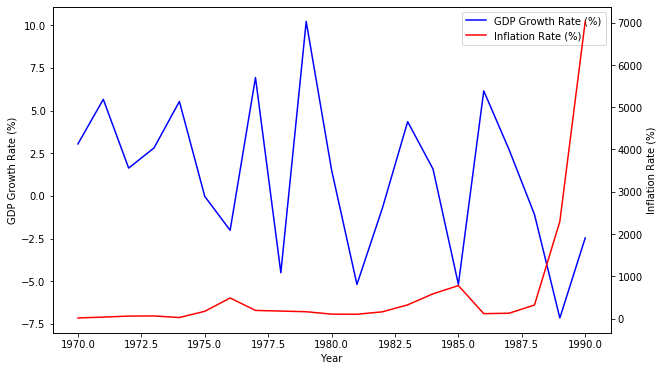

In [436]:
#   Plot inflation and gdp rates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set twinx for dual y axes
ax2 = ax1.twinx()

# Brevity variables
y1 = "GDP Growth Rate (%)"
y2 = "Inflation Rate (%)"

# plot
argentina.plot(kind = "line", x = "year", y = "GDP growth (annual %)", ax = ax1, color = 'b', label = y1)
argentina.plot(kind = "line", x = "year", y = "inflation_rate", ax=ax2, color = 'r', label = y2)

# axes labels
ax1.set_xlabel("Year")
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)

# fix legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines, labels)

plt.show()

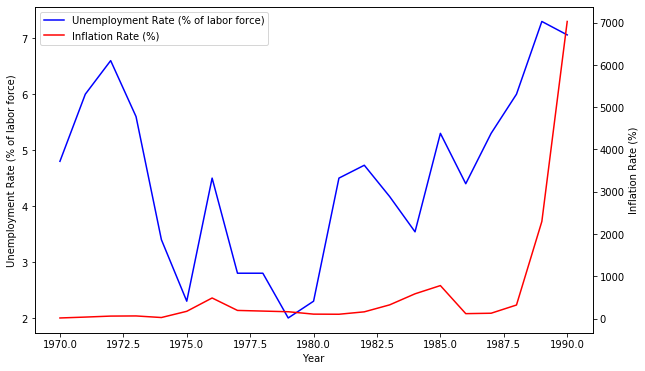

In [437]:
#   Plot inflation and unemployment

#   Plot inflation and gdp rates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set twinx for dual y axes
ax2 = ax1.twinx()

# brevity variable
y3 = "Unemployment Rate (% of labor force)"

# plot
argentina.plot(kind = "line", x = "year", y = "unemployment_rate", ax = ax1, color = 'b', label = y3)
argentina.plot(kind = "line", x = "year", y = "inflation_rate", ax=ax2, color = 'r', label = y2)

# axes labels
ax1.set_xlabel("Year")
ax1.set_ylabel(y3)
ax2.set_ylabel(y2)

# fix legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines, labels)

plt.show()

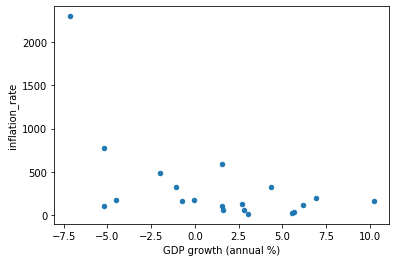

In [438]:
#   Plot for all years except 1990
argentina.loc[argentina.year != 1990].plot(kind = "scatter", x = "GDP growth (annual %)", y = "inflation_rate")

In [439]:
# Check years 1985-1989 inflation

argentina.loc[argentina.year < 1990].tail()

,year,GDP growth (annual %),inflation_rate,unemployment_rate
15,1985,-5.189024,779.941667,5.3
16,1986,6.153377,115.891667,4.4
17,1987,2.704869,125.700000,5.3
18,1988,-1.089933,320.233333,6.0
19,1989,-7.156950,2297.016667,7.3


In [440]:
# Assign years of interest for aggregation (1985-1989)
yoi = list(range(1985, 1990, 1))

# Aggregate average GDP growth and inflation rate to estimate potential output of economy
potential = argentina.loc[argentina["year"].isin(yoi)].mean()

#   Assign x and y values for point A (note A_x is Y* AKA potential output)
A_x = potential[1]
A_y = potential[2]

#   Preview
print(f'''
GDP growth: {A_x}%
Inflation rate: {A_y}%''')

print(yoi)



GDP growth: -0.9155322%
Inflation rate: 727.7566666666668%
[1985, 1986, 1987, 1988, 1989]


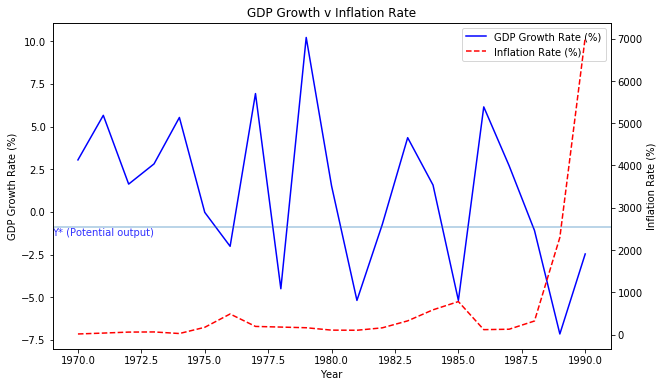

In [476]:
#   Plot gdp growth and inflation for 1970-1990

#   Plot inflation and gdp rates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set twinx for dual y axes
ax2 = ax1.twinx()

# brevity variable
y3 = "Unemployment Rate (% of labor force)"

# plot
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "GDP growth (annual %)", ax = ax1, color = 'b', label = y1)
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "inflation_rate", ax=ax2, color = 'red', label = y2, linestyle = "--")

# axes labels
ax1.set_xlabel("Year")
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)

# Set hline for Y* as a reference
ax1.axhline(y = A_x, alpha = 0.4)
ax1.text(x = plt.xlim()[0], y = A_x * 1.5, s = "Y* (Potential output)", color = "b", alpha = 0.8)

# fix legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines, labels)

plt.title("GDP Growth v Inflation Rate")
plt.show()
fig.savefig(fname = "plots/gdpVinflation.png")

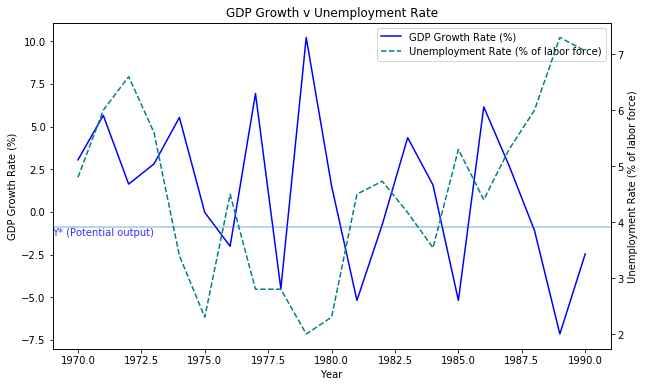

In [477]:
#   Plot gdp growth and unemployment for 1970-1990

#   Plot inflation and gdp rates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set twinx for dual y axes
ax2 = ax1.twinx()

# brevity variable
y3 = "Unemployment Rate (% of labor force)"

# plot
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "GDP growth (annual %)", ax = ax1, color = 'b', label = y1)
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "unemployment_rate", ax=ax2, color = 'teal', label = y3, linestyle = "--")

# axes labels
ax1.set_xlabel("Year")
ax1.set_ylabel(y1)
ax2.set_ylabel(y3)

# Set hline for Y* as a reference
ax1.axhline(y = A_x, alpha = 0.4)
ax1.text(x = plt.xlim()[0], y = A_x * 1.5, s = "Y* (Potential output)", color = "b", alpha = 0.8)

# fix legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines, labels)

plt.title("GDP Growth v Unemployment Rate")
plt.show()
fig.savefig(fname = "plots/gdpVunemployment.png")

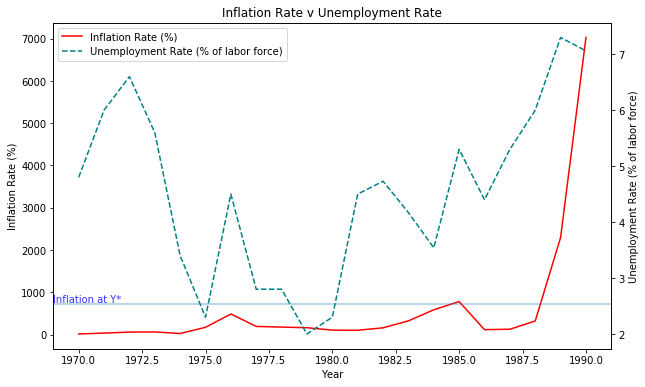

In [478]:
#   Plot inflation and unemployment for 1970-1990

#   Plot inflation and gdp rates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set twinx for dual y axes
ax2 = ax1.twinx()

# brevity variable
y3 = "Unemployment Rate (% of labor force)"

# plot
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "inflation_rate", ax = ax1, color = 'r', label = y2)
argentina.loc[argentina.year >= 1970].plot(kind = "line", x = "year", y = "unemployment_rate", ax=ax2, color = 'teal', label = y3, linestyle = '--')

# axes labels
ax1.set_xlabel("Year")
ax1.set_ylabel(y2)
ax2.set_ylabel(y3)

# Set hline for Y* as a reference
ax1.axhline(y = A_y, alpha = 0.4)
ax1.text(x = plt.xlim()[0], y = A_y * 1.05, s = "Inflation at Y*", color = "b", alpha = 0.8)

# fix legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines, labels)

plt.title("Inflation Rate v Unemployment Rate")
plt.show()
fig.savefig(fname = "plots/inflationVunemployment.png")

#### Macro analysis

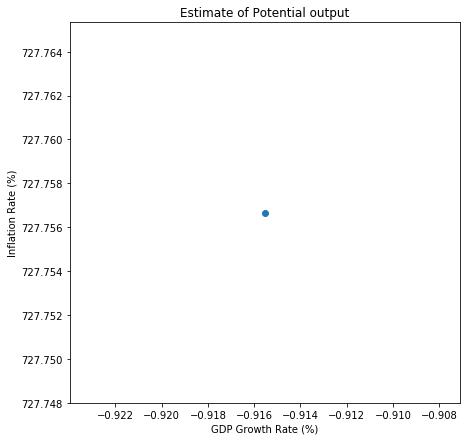

In [489]:
#  Plot point A
fig, ax = plt.subplots(figsize = (7,7))
plt.ticklabel_format(useOffset = False)

plt.scatter(x = A_x, y = A_y)

plt.xlabel(y1)
plt.ylabel(y2)

plt.yticks

plt.title("Estimate of Potential output")
plt.show()
fig.savefig(fname = "plots/macro_basic.png")

The next step is to draw up a mock AD-AS model where Y* (the point above where the economy is operating at its potential output) is the equilibrium point.

In [445]:

#   Create linear equation for AD
# Find B for intersection at equilibrium: if y = mx +b, then b = y -mx
AD_x_intersect = A_x
AD_y_intersect = A_y
AD_m = -1000
AD_b = AD_y_intersect - (AD_m * AD_x_intersect)

AD_x = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi)])

# Linear points for AD curve
AD_y = [(AD_m * x_val) + AD_b for x_val in AD_x]

# #   Assumption: SRAS = LRAS
# # LRAS curve (just needs x value since it LRAS is a vertical curve)
LRAS_x = A_x

# SRAS curve (same intersection as AD, but of course different slope)
SRAS_m = 1000
SRAS_b = AD_y_intersect - (SRAS_m * AD_x_intersect)
SRAS_x = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi)])

# Linear points for SRAS curve

SRAS_y = [(SRAS_m * x_val) + SRAS_b for x_val in SRAS_x]

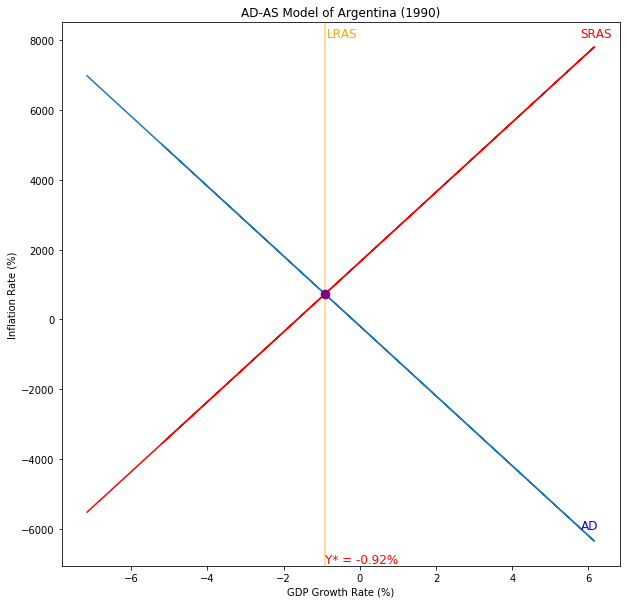

In [496]:

#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x, AD_y)

# LRAS curve
ax.axvline(x = LRAS_x, color = "orange", alpha = 0.5)

# SRAS curve
ax.plot(SRAS_x, SRAS_y, color = "r")

# Point A
ax.scatter(A_x, A_y, color = "purple", s = 75, zorder = 100)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x, y = y_min, s = f"Y* = {round(A_x, 2)}%", color = "red", va = "bottom", fontsize = 12)

#   Labels for curves
# SRAS label
plt.text(x = (0.85 * x_max), y = (0.95 * y_max), s = "SRAS", color = "red", fontsize = 12)

# AD label
plt.text(x = (0.85 * x_max), y = (0.85 * y_min), s = "AD", color = "blue", fontsize = 12)

# LRAS label
plt.text(x = (A_x + 0.05), y = (0.95 * y_max), s = "LRAS", color = "orange", fontsize = 12)

plt.xlabel(y1)
plt.ylabel(y2)

plt.title("AD-AS Model of Argentina (1990)")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS1.png")

This is the model we will be comparing the year 1990 with; reuse code with plotting of 1990 as an additional point

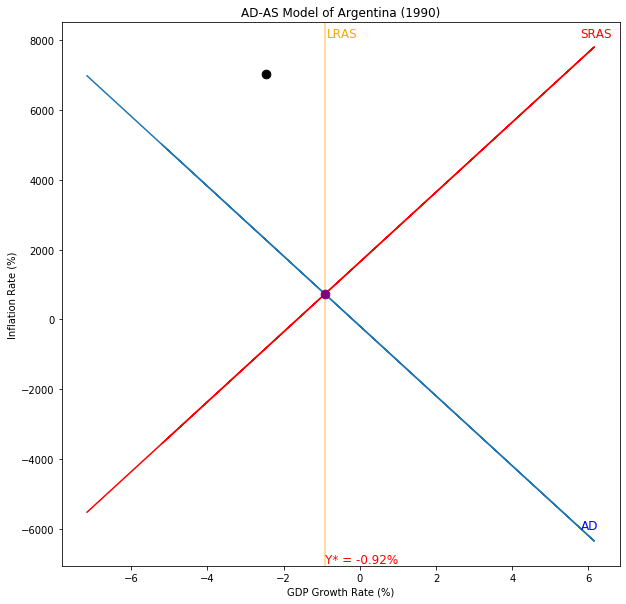

In [498]:

#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x, AD_y)

# LRAS curve
ax.axvline(x = LRAS_x, color = "orange", alpha = 0.5)

# SRAS curve
ax.plot(SRAS_x, SRAS_y, color = "r")

# Point A
ax.scatter(A_x, A_y, color = "purple", s = 75, zorder = 100)

# Plot point of year = 1990 (refer to as point B)
x1990 = float(argentina.loc[argentina.year == 1990]["GDP growth (annual %)"])
y1990 = float(argentina.loc[argentina.year == 1990]["inflation_rate"])
ax.scatter(x = x1990, y = y1990, color = "black", s = 75)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x, y = y_min, s = f"Y* = {round(A_x, 2)}%", color = "red", va = "bottom", fontsize = 12)

#   Labels for curves
# SRAS label
plt.text(x = (0.85 * x_max), y = (0.95 * y_max), s = "SRAS", color = "red", fontsize = 12)

# AD label
plt.text(x = (0.85 * x_max), y = (0.85 * y_min), s = "AD", color = "blue", fontsize = 12)

# LRAS label
plt.text(x = (A_x + 0.05), y = (0.95 * y_max), s = "LRAS", color = "orange", fontsize = 12)

plt.xlabel(y1)
plt.ylabel(y2)

plt.title("AD-AS Model of Argentina (1990)")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS2.png")

Plot copy of this with a vline to reference the output gap

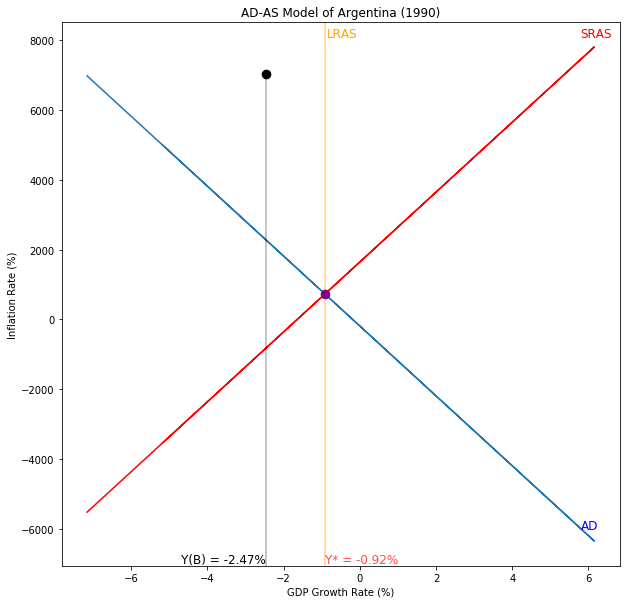

In [518]:

#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x, AD_y)

# LRAS curve
ax.axvline(x = LRAS_x, color = "orange", alpha = 0.5)

# SRAS curve
ax.plot(SRAS_x, SRAS_y, color = "r")

# Point A
ax.scatter(A_x, A_y, color = "purple", s = 75, zorder = 100)

# Plot point of year = 1990 (refer to as point B)
x1990 = float(argentina.loc[argentina.year == 1990]["GDP growth (annual %)"])
y1990 = float(argentina.loc[argentina.year == 1990]["inflation_rate"])
ax.scatter(x = x1990, y = y1990, color = "black", s = 75)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x, y = y_min, s = f"Y* = {round(A_x, 2)}%", color = "red", va = "bottom", fontsize = 12, alpha = 0.7)

# vline for referencing point B's output and label
ax.axvline(x = x1990, ymin = y_min, ymax = 0.9, color = "black", alpha = 0.3)
plt.text(x = (x1990 * 1.9), y = y_min, s = f"Y(B) = {round(x1990, 2)}%", color = "black", va = "bottom", fontsize = 12)

#   Labels for curves
# SRAS label
plt.text(x = (0.85 * x_max), y = (0.95 * y_max), s = "SRAS", color = "red", fontsize = 12)

# AD label
plt.text(x = (0.85 * x_max), y = (0.85 * y_min), s = "AD", color = "blue", fontsize = 12)

# LRAS label
plt.text(x = (A_x + 0.05), y = (0.95 * y_max), s = "LRAS", color = "orange", fontsize = 12)


plt.xlabel(y1)
plt.ylabel(y2)

plt.title("AD-AS Model of Argentina (1990)")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS2A.png")

Next step is to chart how AD and SRAS shifted for this to be the case.

In [339]:

#   Create linear equation for AD
# Find B for intersection at equilibrium: if y = mx +b, then b = y -mx
new_AD_x_intersect = x1990
new_AD_y_intersect = y1990
new_AD_m = -1000
new_AD_b = new_AD_y_intersect - (new_AD_m * new_AD_x_intersect)

new_AD_x = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi)])

# Linear points for AD curve
new_AD_y = [(new_AD_m * x_val) + new_AD_b for x_val in new_AD_x]

# SRAS curve (same intersection as AD, but of course different slope)
new_SRAS_m = 1000
new_SRAS_b = new_AD_y_intersect - (new_SRAS_m * new_AD_x_intersect)
new_SRAS_x = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi)])

# Linear points for SRAS curve

new_SRAS_y = [(new_SRAS_m * x_val) + new_SRAS_b for x_val in new_SRAS_x]

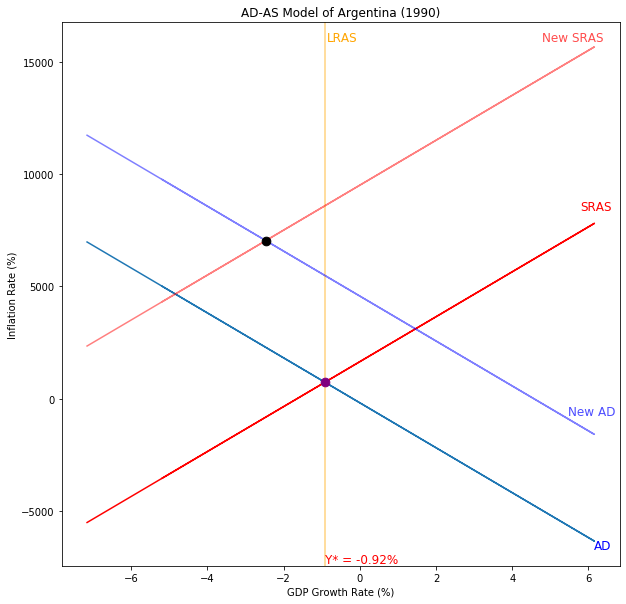

In [527]:
#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x, AD_y)

# LRAS curve
ax.axvline(x = LRAS_x, color = "orange", alpha = 0.5)

# SRAS curve
ax.plot(SRAS_x, SRAS_y, color = "r")

# Point A
ax.scatter(A_x, A_y, color = "purple", s = 75, zorder = 100)

# new_AD curve
ax.plot(new_AD_x, new_AD_y, color = "b",alpha = 0.5)

# new_SRAS curve
ax.plot(new_SRAS_x, new_SRAS_y, color = "r", alpha = 0.5)

# Plot point of year = 1990 (refer to as point B)
x1990 = float(argentina.loc[argentina.year == 1990]["GDP growth (annual %)"])
y1990 = float(argentina.loc[argentina.year == 1990]["inflation_rate"])
ax.scatter(x = x1990, y = y1990, color = "black", s = 75, zorder = 101)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x, y = y_min, s = f"Y* = {round(A_x, 2)}%", color = "red", va = "bottom", fontsize = 12)

#   Labels for curves
# SRAS label
plt.text(x = (0.85 * x_max), y = (0.5 * y_max), s = "SRAS", color = "red", fontsize = 12)

# AD label
plt.text(x = (0.9 * x_max), y = (0.9 * y_min), s = "AD", color = "blue", fontsize = 12)

# new_SRAS label
plt.text(x = (0.7 * x_max), y = (0.95 * y_max), s = "New SRAS", color = "red", fontsize = 12, alpha = 0.7)

# new_AD label
plt.text(x = (0.8 * x_max), y = (0.1 * y_min), s = "New AD", color = "blue", fontsize = 12, alpha = 0.7)

# LRAS label
plt.text(x = (A_x + 0.05), y = (0.95 * y_max), s = "LRAS", color = "orange", fontsize = 12)

plt.xlabel(y1)
plt.ylabel(y2)

plt.title("AD-AS Model of Argentina (1990)")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS3.png")

Supply shifted left, meaning it decreased
Demand shifted right, meaning it increased.

The result is a higher inflation rate and a lower GDP growth rate

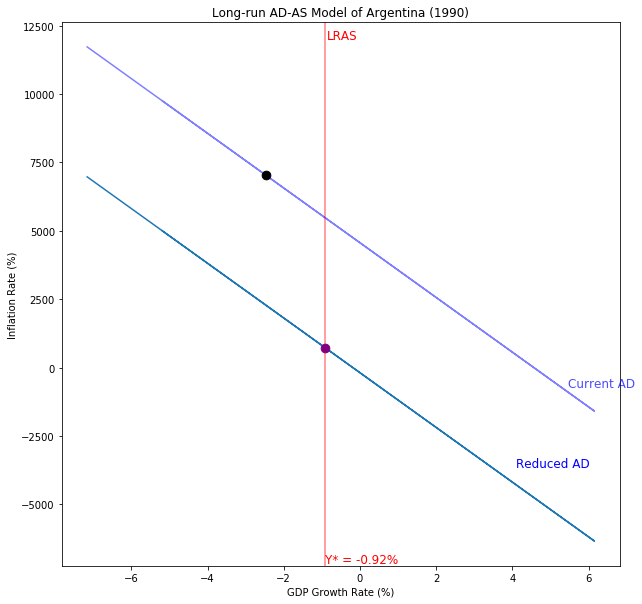

In [534]:
#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x, AD_y)

# LRAS curve
ax.axvline(x = LRAS_x, color = "red", alpha = 0.5)

# Point A
ax.scatter(A_x, A_y, color = "purple", s = 75, zorder = 100)

# new_AD curve
ax.plot(new_AD_x, new_AD_y, color = "b",alpha = 0.5)

# Plot point of year = 1990 (refer to as point B)
x1990 = float(argentina.loc[argentina.year == 1990]["GDP growth (annual %)"])
y1990 = float(argentina.loc[argentina.year == 1990]["inflation_rate"])
ax.scatter(x = x1990, y = y1990, color = "black", s = 75, zorder = 101)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x, y = y_min, s = f"Y* = {round(A_x, 2)}%", color = "red", va = "bottom", fontsize = 12)

#   Labels for curves

# AD label
plt.text(x = (0.6 * x_max), y = (0.5 * y_min), s = "Reduced AD", color = "blue", fontsize = 12)

# new_AD label
plt.text(x = (0.8 * x_max), y = (0.1 * y_min), s = "Current AD", color = "blue", fontsize = 12, alpha = 0.7)

# LRAS label
plt.text(x = (A_x + 0.05), y = (0.95 * y_max), s = "LRAS", color = "red", fontsize = 12)

plt.xlabel(y1)
plt.ylabel(y2)

plt.title("Long-run AD-AS Model of Argentina (1990)")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS_longrun.png")

----

##### What if Y* is from a 10-year average?

In [450]:
# Assign years of interest for aggregation (1979-1989)
yoi2 = list(range(1979, 1990, 1))

# Aggregate average GDP growth and inflation rate to estimate potential output of economy
potential = argentina.loc[argentina["year"].isin(yoi2)].mean()

#   Assign x and y values for point A (note A_x is Y* AKA potential output)
A_x2 = potential[1]
A_y2 = potential[2]

#   Preview
print(f'''
GDP growth: {A_x2}%
Inflation rate: {A_y2}%''')

print(yoi2)



GDP growth: 0.6507515272727271%
Inflation rate: 461.25151515151515%
[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]


In [461]:
#   Create linear equation for AD
# Find B for intersection at equilibrium: if y = mx +b, then b = y -mx
AD_x_intersect2 = A_x2
AD_y_intersect2 = A_y2
AD_m2 = -1000
AD_b2 = AD_y_intersect2 - (AD_m2 * AD_x_intersect2)

AD_x2 = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi2)])

# Linear points for AD curve
AD_y2 = [(AD_m2 * x_val) + AD_b2 for x_val in AD_x2]

# #   Assumption: SRAS = LRAS
# # LRAS curve (just needs x value since it LRAS is a vertical curve)
LRAS_x2 = A_x2

# SRAS curve (same intersection as AD, but of course different slope)
SRAS_m2 = 1000
SRAS_b2 = AD_y_intersect2 - (SRAS_m2 * AD_x_intersect2)
SRAS_x2 = list(argentina["GDP growth (annual %)"].loc[argentina["year"].isin(yoi2)])

# Linear points for SRAS curve

SRAS_y2 = [(SRAS_m2 * x_val) + SRAS_b2 for x_val in SRAS_x2]

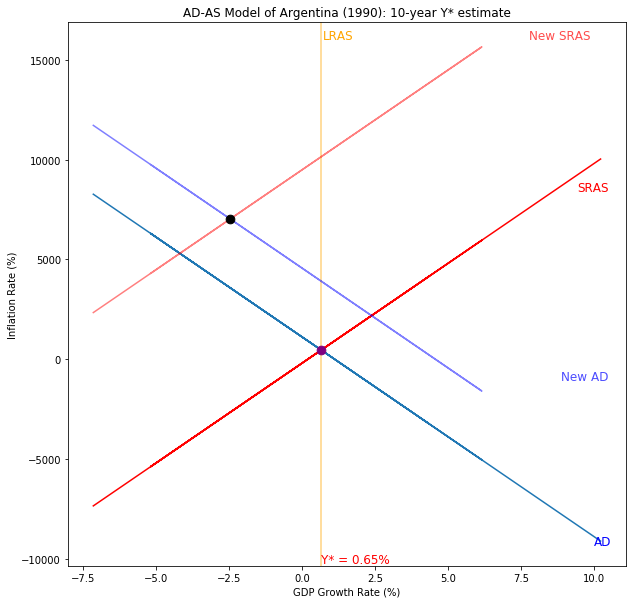

In [494]:
#  Plot point A with mock AD-AS model
fig, ax = plt.subplots(figsize = (10,10))
ax.ticklabel_format(useMathText = False)


# AD curve
ax.plot(AD_x2, AD_y2)

# LRAS curve
ax.axvline(x = LRAS_x2, color = "orange", alpha = 0.5)

# SRAS curve
ax.plot(SRAS_x2, SRAS_y2, color = "r")

# Point A
ax.scatter(A_x2, A_y2, color = "purple", s = 75, zorder = 100)

# new_AD curve
ax.plot(new_AD_x, new_AD_y, color = "b",alpha = 0.5)

# new_SRAS curve
ax.plot(new_SRAS_x, new_SRAS_y, color = "r", alpha = 0.5)

# Plot point of year = 1990 (refer to as point B)
x1990 = float(argentina.loc[argentina.year == 1990]["GDP growth (annual %)"])
y1990 = float(argentina.loc[argentina.year == 1990]["inflation_rate"])
ax.scatter(x = x1990, y = y1990, color = "black", s = 75, zorder = 101)

# Put x tick label to highlight point A's GDP growth rate and simulate Y* (potential output)
y_min, y_max = plt.ylim()
x_min, x_max = plt.xlim()
plt.text(x = A_x2, y = y_min, s = f"Y* = {round(A_x2, 2)}%", color = "red", va = "bottom", fontsize = 12)

#   Labels for curves
# SRAS label
plt.text(x = (0.85 * x_max), y = (0.5 * y_max), s = "SRAS", color = "red", fontsize = 12)

# AD label
plt.text(x = (0.9 * x_max), y = (0.9 * y_min), s = "AD", color = "blue", fontsize = 12)

# new_SRAS label
plt.text(x = (0.7 * x_max), y = (0.95 * y_max), s = "New SRAS", color = "red", fontsize = 12, alpha = 0.7)

# new_AD label
plt.text(x = (0.8 * x_max), y = (0.1 * y_min), s = "New AD", color = "blue", fontsize = 12, alpha = 0.7)

# LRAS label
plt.text(x = (A_x2 + 0.05), y = (0.95 * y_max), s = "LRAS", color = "orange", fontsize = 12)

plt.xlabel(y1)
plt.ylabel(y2)

plt.title("AD-AS Model of Argentina (1990): 10-year Y* estimate")
plt.show()
fig.savefig(fname = "plots/macro_AD-AS10.png")